# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [10]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

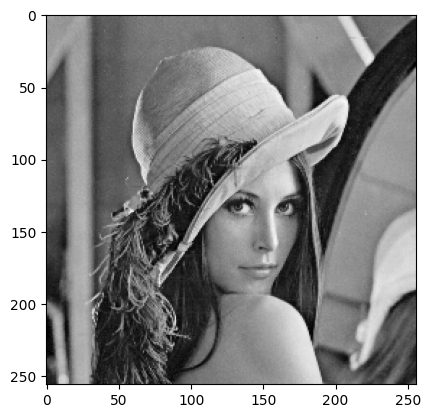

In [11]:
lena=plt.imread('data/lena.png')
plt.imshow(lena, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [12]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            if(p[1]>=n) and (p[1]<=(img.shape[1]-n-1)) and (p[0]>=n) and (p[0]<=(img.shape[0]-n-1)):
                y=p[0]-n+q[0]
                x=p[1]-n+q[1]
                neighborhood_sum+=img[y,x]
        neighborhood_sum=neighborhood_sum/(size**2)
        result[p] = neighborhood_sum
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

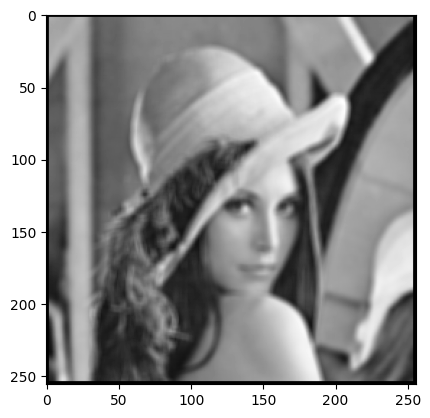

In [13]:
lena_mean=meanfilter(lena, 5)
plt.imshow(lena_mean, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

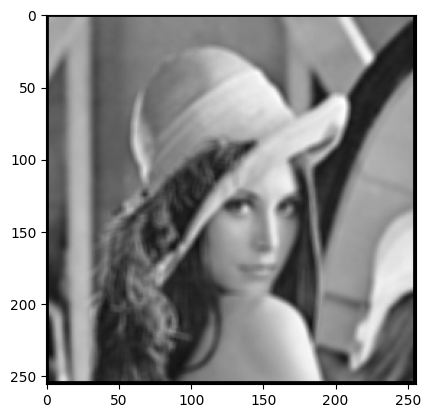

In [14]:
lena_mean_ideal=plt.imread('data/lena_meanfilter5.png')
plt.imshow(lena_mean_ideal, 'gray')

(0.0, 50.0)

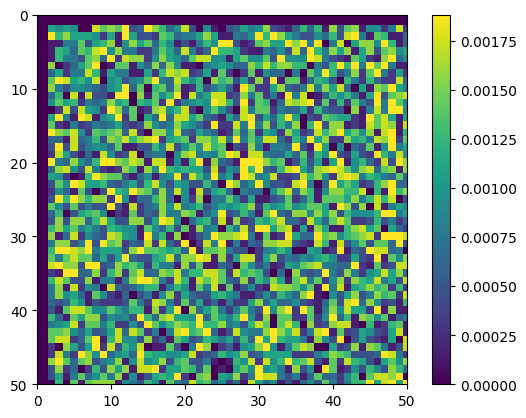

In [15]:
diff = numpy.abs(lena_mean_ideal - lena_mean)
plt.imshow(diff)
plt.colorbar()
plt.ylim(50, 0)
plt.xlim(0, 50)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [17]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_list = []
        if(p[1]>=n) and (p[1]<=(img.shape[1]-n-1)) and (p[0]>=n) and (p[0]<=(img.shape[0]-n-1)):
            for q in numpy.ndindex(size, size):
                y=p[0]-n+q[0]
                x=p[1]-n+q[1]
                neighborhood_list.append(img[y,x])
            neighborhood_list=sorted(neighborhood_list)
            result[p] = neighborhood_list[(size**2)  // 2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

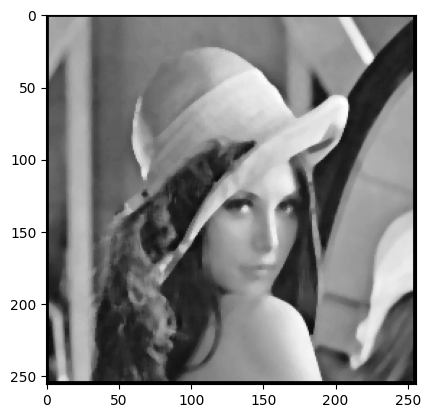

In [18]:
lena_median=medianfilter(lena, 5)
plt.imshow(lena_median, 'gray')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

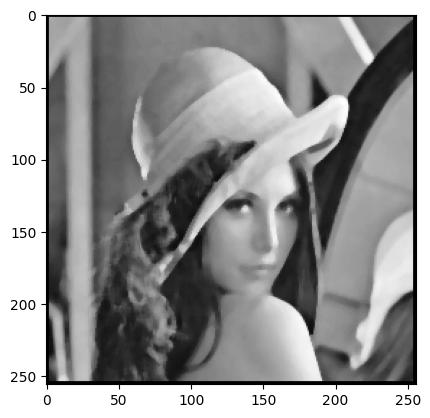

In [19]:
lena_median_ideal=plt.imread('data/lena_medianfilter5.png')
plt.imshow(lena_median_ideal, 'gray')

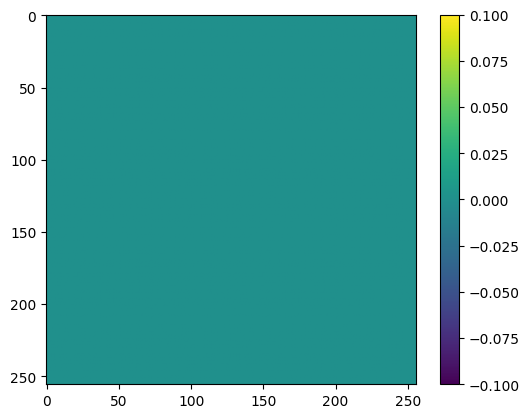

In [20]:
diff = numpy.abs(lena_median_ideal - lena_median)
plt.imshow(diff)
plt.colorbar()
#plt.ylim(50, 0)
#plt.xlim(0, 50)

In [21]:
assert numpy.allclose(lena_median, lena_median_ideal, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [22]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

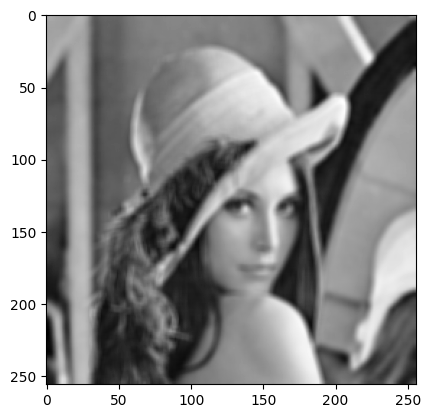

In [23]:
scipu= scipy.ndimage.uniform_filter(lena,5)
plt.imshow(scipu, 'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

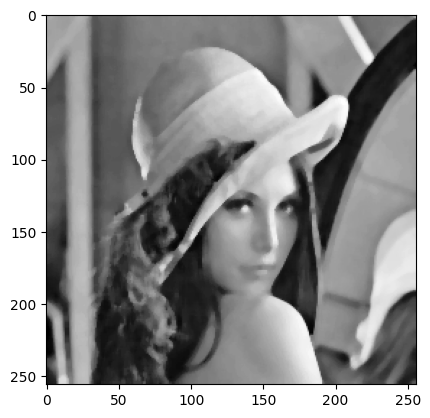

In [24]:
scipm = scipy.ndimage.median_filter(lena,5)
plt.imshow(scipm, 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

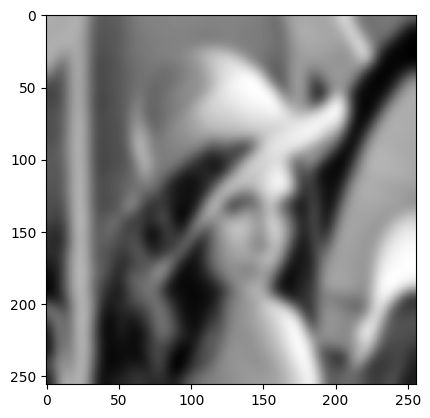

In [25]:
scipg = scipy.ndimage.gaussian_filter(lena,5)
plt.imshow(scipg, 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

lena war bei mir schärfer ^^

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [40]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if(p[1]>=n) and (p[1]<=(img.shape[1]-n-1)) and (p[0]>=n) and (p[0]<=(img.shape[0]-n-1)):
            mask = img[(p[0]-n):(p[0]+n+1),(p[1]-n):(p[1]+n+1)]
            neighborhood_sum = mask.mean()
        result[p] = neighborhood_sum
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

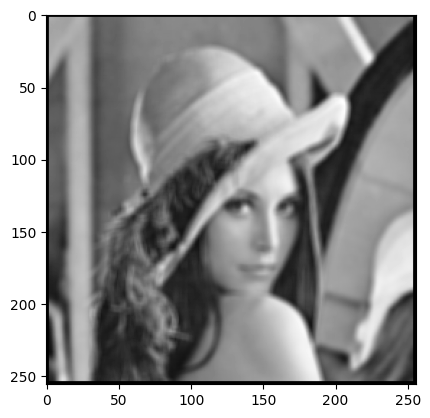

In [41]:
lenaf=fastfilter(lena,5)
plt.imshow(lenaf, 'gray')

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

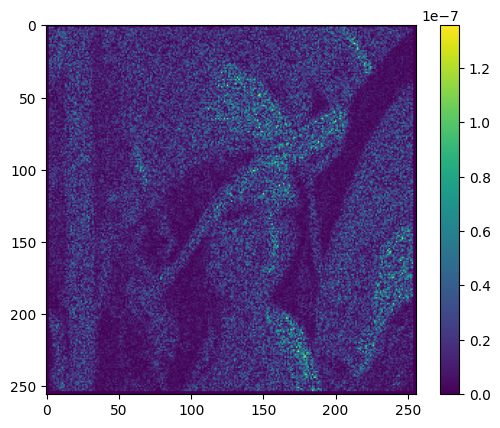

In [42]:
diff = numpy.abs(lena_mean - lenaf)
plt.imshow(diff)
plt.colorbar()
#plt.ylim(50, 0)
#plt.xlim(0, 50)

In [43]:
assert numpy.allclose(lena_mean, lenaf, atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [44]:
%timeit fastfilter(lena, 9)

481 ms ± 66.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%timeit meanfilter(lena,9)

4.46 s ± 97.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

In [ ]:
fastfilter:3.8s
meanfilter:35.8s